# Heart Disease Data Set_ML
# Md.Rafsan Jamil


# Import Libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [17]:
df = pd.read_csv("processed_cleavened.csv", header=None, na_values="?")
df = df.dropna()
display(df.head(10))
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,3
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,2
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


(303, 14)


# Dataset information¶
1.age: age in years

2.sex: sex (1 = male; 0 = female)

3.cp: chest pain type


    A. 1= typical angina
    B. 2= atypical angina
    C. 3= non-anginal pain
    D. 4= asymptomatic
    
4.trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5.chol: serum cholestoral in mg/dl

6.fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

7.restecg: resting electrocardiographic results


      A.0 = normal
      B. 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      C. 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
      
8.thalach: maximum heart rate achieved

9.exang: exercise induced angina (1 = yes; 0 = no)

10.oldpeak: ST depression induced by exercise relative to rest

11.slope: the slope of the peak exercise ST segment

     A.1 = upsloping
     B.2 = flat
     C. 3 = downsloping
     
12.ca: number of major vessels (0-3) colored by flourosopy

13.thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

14.hd: heart disease

# Rename the column names

In [18]:

df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 
              'restecg', 'thalach', 'exang', 'oldpeak', 
              'slope', 'ca', 'thal', 'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  hd        303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


# Transform Target variable 'hd' into Binary classification

In [5]:
print(df['hd'].value_counts())

0    164
1     55
2     36
3     35
4     13
Name: hd, dtype: int64


In [20]:
df[df['hd'] > 1] = 1

print(df['hd'].value_counts())

0    164
1    139
Name: hd, dtype: int64


# Separating the features and target variable

In [21]:
X = df.drop('hd', axis=1)
y = df[['hd']]

print(X.shape, y.shape)

(303, 13) (303, 1)


# One-hot Encoding

In [22]:
X = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)

display(X.head())
print(X.shape)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_2,...,cp_4,restecg_1,restecg_2,slope_1,slope_2,slope_3,thal_1,thal_3,thal_6,thal_7
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,1,1,1,1,1,1,1.0,1,0,...,0,1,0,1,0,0,1,0,0,0
2,67,1,120,229,0,129,1,2.6,2,0,...,1,0,1,0,1,0,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,0,0,0,0,1,0,1,0,0
4,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,1,0,0,0,1,0,0


(303, 21)


# Create train and test set

In [23]:
# Split the dataset intro train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 21) (61, 21) (242, 1) (61, 1)


# Training with Decision Tree Classifier

In [24]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT = model_DT.fit(X_train, y_train)

# Tree Diagram

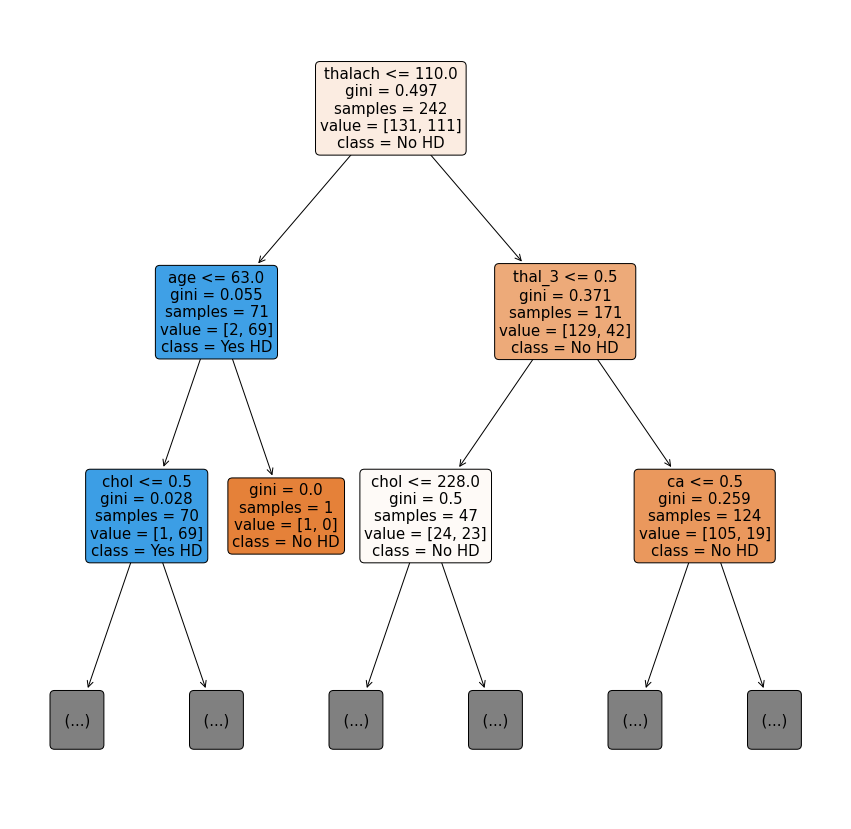

In [25]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
          rounded=True,
          class_names = ["No HD", "Yes HD"],
          feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

# Model Performance Evaluation

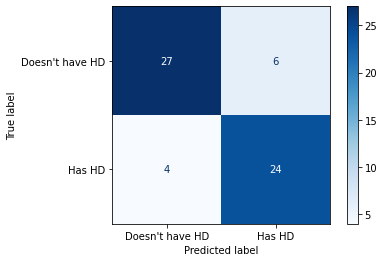

In [26]:
# Confusion Matrix
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have HD", "Has HD"],
                      cmap='Blues')
plt.show()

# Prediction

In [27]:
y_pred_DT = model_DT.predict(X_test)

In [28]:
# Calculate accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

Accuracy:  0.8360655737704918


# Prediction Comparison with the test data

In [29]:
y_test['probability'] = np.round(model_DT.predict_proba(X_test)[:,1], 2)
y_test['predicted_hd'] = y_pred_DT

display(y_test.sample(10))

,hd,probability,predicted_hd
94,0,0.0,0
3,0,1.0,1
243,1,1.0,1
34,0,0.0,0
131,0,0.0,0
168,1,1.0,1
234,0,0.0,0
137,1,1.0,1
205,1,1.0,1
300,1,1.0,1


# ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

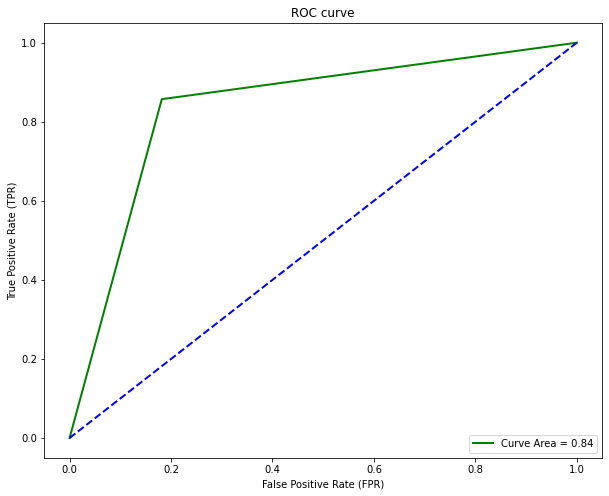

In [30]:
fpr, tpr, thr = roc_curve(y_test['hd'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['hd'], 
                             y_test['predicted_hd']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Classification report

In [31]:
class_report = classification_report(y_test['hd'], 
                                     y_test['predicted_hd'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.80      0.86      0.83        28

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

